In [151]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh


In [152]:
# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
import functions

In [153]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
#read csv into data frame fucntion
def read_a_csv(file_path, df_name):
    """
    Read a CSV file and return a DataFrame.

    Args:
        file_path (str): Path to the CSV file.
        df_name (str): Variable name for the DataFrame.

    Returns:
        pandas.DataFrame: DataFrame containing the CSV data.
    """
    try:
        df_name = pd.read_csv(file_path)
        return df_name
    except FileNotFoundError:
        print("Error: File not found.")
        return None

In [155]:
us_videos_csv = functions.read_file('../data/USvideos.csv')

<Axes: >

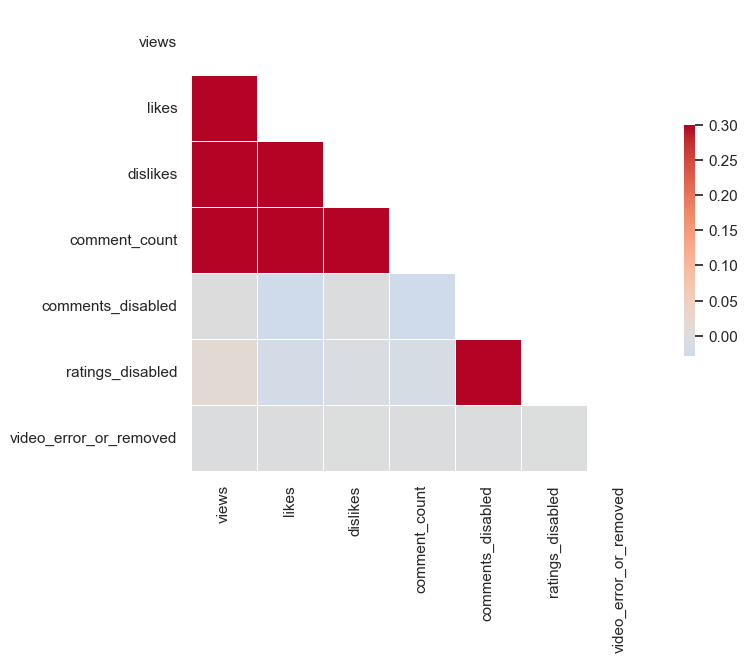

In [156]:
functions.numerics_corr_matrix(us_videos_csv)

In [122]:
us_videos_json = functions.read_file('../data/US_category_id.json')

In [123]:
final_df = functions.merge_csv_json(us_videos_csv, us_videos_json)

In [124]:
final_df['category_id'].dtype

dtype('int64')

In [125]:
#us_videos_null[us_videos_null['video_id'].str.startswith("\n") == True]

In [126]:
#removes non-numeric fields in order to enable correlation by key areas
numerics_only = us_videos.drop(columns=['video_id', 'title', 'channel_title', 'tags', 'thumbnail_link', 'description', 'trending_date', 'category_id'])
numerics_only_by_time = numerics_only.set_index('publish_time')
numerics_only_by_time

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Cat_Title
publish_time,,,,,,,,
2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False,People & Blogs
2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False,Entertainment
2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False,Comedy
2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False,Entertainment
2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False,Entertainment
...,...,...,...,...,...,...,...,...
2018-05-18T13:00:04.000Z,1685609,38160,1385,2657,False,False,False,Pets & Animals
2018-05-18T01:00:06.000Z,1064798,60008,382,3936,False,False,False,People & Blogs
2018-05-18T17:34:22.000Z,1066451,48068,1032,3992,False,False,False,Entertainment


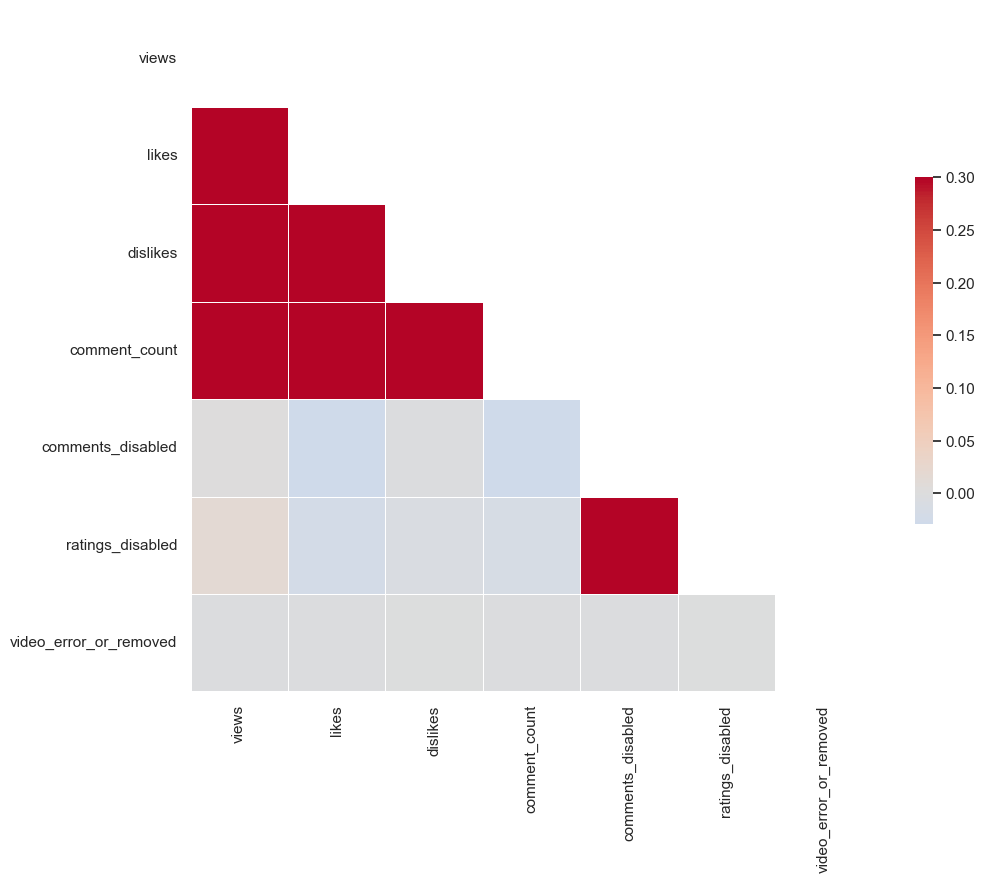

In [127]:
sns.set_theme(style="white")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [128]:
def describe_dataframe(df):
    """
    Generate descriptive statistics for each numerical column in a Pandas DataFrame.

    Args:
        data (pandas.DataFrame): DataFrame for which to generate descriptive statistics.

    Returns:
        pandas.DataFrame: DataFrame containing descriptive statistics.
    """
    output = df.describe()
    
    return output

In [129]:
describe_dataframe(us_videos).drop('category_id', axis=1)

,views,likes,dislikes,comment_count
count,"40,949","40,949","40,949","40,949"
mean,"2,360,785","74,267","3,711","8,447"
std,"7,394,114","228,885","29,030","37,430"
min,549,0,0,0
25%,"242,329","5,424",202,614
50%,"681,861","18,091",631,"1,856"
75%,"1,823,157","55,417","1,938","5,755"
max,"225,211,923","5,613,827","1,674,420","1,361,580"


In [130]:
def describe_dataframe(df):
    """
    Generate descriptive statistics for each numerical column in a Pandas DataFrame.

    Args:
        data (pandas.DataFrame): DataFrame for which to generate descriptive statistics.

    Returns:
        pandas.DataFrame: DataFrame containing descriptive statistics.
    """
    pd.options.display.float_format = '{:,.0f}'.format
    output = df.describe()
    return output

In [131]:
describe_dataframe(us_videos)

,category_id,views,likes,dislikes,comment_count
count,"40,949","40,949","40,949","40,949","40,949"
mean,20,"2,360,785","74,267","3,711","8,447"
std,8,"7,394,114","228,885","29,030","37,430"
min,1,549,0,0,0
25%,17,"242,329","5,424",202,614
50%,24,"681,861","18,091",631,"1,856"
75%,25,"1,823,157","55,417","1,938","5,755"
max,43,"225,211,923","5,613,827","1,674,420","1,361,580"


In [132]:
final_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Cat_Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [133]:
final_df.groupby('channel_title').sum()

,video_id,trending_date,title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Cat_Title
channel_title,,,,,,,,,,,,,,,,
12 News,9KIP-Ncp2jU9KIP-Ncp2jU,17.15.1117.16.11,Bill Gates bought land in Arizona to build tec...,44,2017-11-11T01:03:01.000Z2017-11-11T01:03:01.000Z,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",177970,352,90,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg...,0,0,0,Philanthropist and inventor Bill Gates paid $...,People & BlogsPeople & Blogs
1MILLION Dance Studio,QRq0pkr2TWMQRq0pkr2TWM_xwX82Y0Oro_xwX82Y0Oro_x...,18.25.0218.26.0218.01.0318.02.0318.03.0318.04....,Cheap Thrills - Sia / Tina Boo ChoreographyChe...,792,2018-02-19T12:00:02.000Z2018-02-19T12:00:02.00...,"choreography|""1million dance studio""|""원밀리언 댄스 ...",20959169,1399898,15030,110408,https://i.ytimg.com/vi/QRq0pkr2TWM/default.jpg...,0,0,0,Tina boo teaches choreography to Cheap Thrills...,EntertainmentEntertainmentEntertainmentEnterta...
1theK (원더케이),oddXT5uaRb8oddXT5uaRb8oddXT5uaRb8S10azlzvS_8S1...,17.19.1117.20.1117.21.1118.05.0118.06.0118.07....,[MV] Samuel(사무엘) _ Candy(캔디)[MV] Samuel(사무엘) _...,190,2017-11-16T09:00:02.000Z2017-11-16T09:00:02.00...,"Kpop|""1theK""|""원더케이""|""loen""|""로엔""|""뮤비""|""티져""|""MV""...",57375949,3663362,63329,255669,https://i.ytimg.com/vi/oddXT5uaRb8/default.jpg...,0,0,0,"[MV] Samuel(사무엘) _ Candy(캔디)\n\n*****\nHello, ...",MusicMusicMusicMusicMusicMusicMusicMusicMusicM...
20th Century Fox,jr9QtXwC9vcjr9QtXwC9vc8-Cjsnq8kVU8-Cjsnq8kVU8-...,17.14.1117.15.1117.16.1117.17.1117.18.1117.19....,The Greatest Showman | Official Trailer 2 [HD]...,135,2017-11-13T14:00:23.000Z2017-11-13T14:00:23.00...,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",1082872611,24419452,488761,1509224,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg...,0,0,0,"Inspired by the imagination of P.T. Barnum, Th...",Film & AnimationFilm & AnimationFilm & Animati...
2CELLOS,ozkqm2ifMw8ozkqm2ifMw8,17.14.1117.15.11,2CELLOS - Cinema Paradiso [OFFICIAL VIDEO]2CEL...,20,2017-11-10T13:24:10.000Z2017-11-10T13:24:10.000Z,"2CELLOS|""Luka Sulic""|""Stjepan Hauser""|""cello""|...",432186,22900,245,917,https://i.ytimg.com/vi/ozkqm2ifMw8/default.jpg...,0,0,0,Get “Cinema Paradiso” from our album “Score” a...,MusicMusic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ワーナー ブラザース 公式チャンネル,QF031DwMffQQF031DwMffQQF031DwMffQQF031DwMffQQF...,17.03.1217.04.1217.05.1217.06.1217.07.1217.08.12,『ニンジャバットマン』 New York Comic Con公開映像【2018年劇場公開予定...,6,2017-12-01T09:06:02.000Z2017-12-01T09:06:02.00...,"ニンジャバットマン|""batman ninja""|""batman""|""神風動画""|""水﨑淳平...",7389323,154962,6128,21560,https://i.ytimg.com/vi/QF031DwMffQ/default.jpg...,0,0,0,日本発！世界に放つ！最強エンタメ！\n２０１８年劇場公開予定 『ニンジャバットマン』\n\n...,Film & AnimationFilm & AnimationFilm & Animati...
圧倒的不審者の極み!,MeNR0guNn70MeNR0guNn70MeNR0guNn70MeNR0guNn70Me...,18.05.0318.06.0318.07.0318.08.0318.09.0318.10....,世界で一番切れるパスタの包丁を作りたい！世界で一番切れるパスタの包丁を作りたい！世界で一番切...,336,2018-03-03T16:16:15.000Z2018-03-03T16:16:15.00...,"kiwami|""作ってみた""|""作り方""|""作成""|""作製""|""自作""|""How""|""to""...",11417717,157447,12315,54177,https://i.ytimg.com/vi/MeNR0guNn70/default.jpg...,0,0,0,この動画は、ある男がパスタを包丁にする為に2週間パスタを食べながら開発に取り組んだヒューマン...,Science & TechnologyScience & TechnologyScienc...
杰威爾音樂 JVR Music,MAjY8mCTXWkMAjY8mCTXWkMAjY8mCTXWkMAjY8mCTXWkMA...,18.15.0518.15.0518.16.0518.17.0518.18.0518.19....,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",290,2018-05-14T15:59:47.000Z2018-05-14T15:59:47.00...,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",400530463,3400678,229439,382766,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg...,0,0,0,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒...,MusicMusicMusicMusicMusicMusicMusicMusicMusicM...


In [135]:
functions.numerics_corr_matrix(us_videos_csv)

ValueError: could not convert string to float: 'People & Blogs'